In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
import seaborn as sns

df = pd.read_csv("food_waste.csv", encoding='cp949')
df.head()


C:\Users\parkh\anaconda3\lib\site-packages\IPython\core\interactiveshell.py:3146: DtypeWarning: Columns (2) have mixed types.Specify dtype option on import or set low_memory=False.
  has_raised = await self.run_ast_nodes(code_ast.body, cell_name,


,base_date,city,emd_cd,emd_nm,em_area_cd,em_cnt,em_g,pay_amt
0,2018-01-01,제주시,50110670,외도동,W6X062,2,15500,464
1,2018-01-01,제주시,50110630,아라동,W6XA97,25,59800,1787
2,2018-01-01,제주시,50110630,아라동,W6XA96,8,25350,758
3,2018-01-01,제주시,50110630,아라동,W6XA95,12,30000,898
4,2018-01-01,제주시,50110630,아라동,W6XA94,14,44050,1317


In [2]:
df.tail()

,base_date,city,emd_cd,emd_nm,em_area_cd,em_cnt,em_g,pay_amt
2211440,2021-06-30,제주시,50110250,한림읍,W6XEB4,12,58250,1743
2211441,2021-06-30,제주시,50110250,한림읍,W6XEB7,15,111000,3326
2211442,2021-06-30,제주시,50110250,한림읍,W6XEB8,21,48300,1444
2211443,2021-06-30,제주시,50110250,한림읍,W6XEA2,5,22050,661
2211444,2021-06-30,제주시,50110640,오라동,W6XAD5,2,2900,87


In [3]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2211445 entries, 0 to 2211444
Data columns (total 8 columns):
 #   Column      Dtype 
---  ------      ----- 
 0   base_date   object
 1   city        object
 2   emd_cd      object
 3   emd_nm      object
 4   em_area_cd  object
 5   em_cnt      int64 
 6   em_g        int64 
 7   pay_amt     int64 
dtypes: int64(3), object(5)
memory usage: 135.0+ MB


In [4]:
df.shape

(2211445, 8)

In [5]:
df.describe(include='all')

,base_date,city,emd_cd,emd_nm,em_area_cd,em_cnt,em_g,pay_amt
count,2211445,2211445,2211445,2211445,2211445,2.211445e+06,2.211445e+06,2.211445e+06
unique,1277,3,83,42,2511,NaN,NaN,NaN
top,2020-07-31,제주시,50110660,노형동,W6X132,NaN,NaN,NaN
freq,2125,1675927,146526,185614,1277,NaN,NaN,NaN
mean,NaN,NaN,NaN,NaN,NaN,2.124917e+01,4.800791e+04,1.436672e+03
std,NaN,NaN,NaN,NaN,NaN,2.713963e+01,5.928571e+04,2.756020e+03
min,NaN,NaN,NaN,NaN,NaN,1.000000e+00,0.000000e+00,0.000000e+00
25%,NaN,NaN,NaN,NaN,NaN,6.000000e+00,1.295000e+04,3.850000e+02
50%,NaN,NaN,NaN,NaN,NaN,1.300000e+01,3.090000e+04,9.210000e+02
75%,NaN,NaN,NaN,NaN,NaN,2.700000e+01,6.215000e+04,1.854000e+03


In [6]:
df['emd_nm'].value_counts()

노형동     185614
이도2동    144229
연동      141737
아라동     134739
일도2동     99348
오라동      94158
화북동      89682
삼양동      85457
외도동      78764
애월읍      75783
용담2동     70400
대정읍      69970
조천읍      60735
남원읍      56768
안덕면      55511
한림읍      54885
동홍동      51542
구좌읍      44457
중문동      43000
이호동      39319
성산읍      38436
삼도1동     38080
건입동      36446
대천동      35269
봉개동      35207
대륜동      32830
표선면      32702
용담1동     31730
이도1동     31499
삼도2동     31433
한경면      30601
도두동      29072
영천동      22862
예래동      20324
서홍동      20265
송산동      16435
일도1동     12552
효돈동      11599
천지동      11565
정방동       9368
중앙동       5318
알수없음      1754
Name: emd_nm, dtype: int64

In [7]:
#쓰레기 배출량/건수/결제 금액 상관계수
df.corr()

,em_cnt,em_g,pay_amt
em_cnt,1.000000,0.861960,0.552038
em_g,0.861960,1.000000,0.686694
pay_amt,0.552038,0.686694,1.000000


<AxesSubplot:xlabel='em_cnt', ylabel='em_g'>

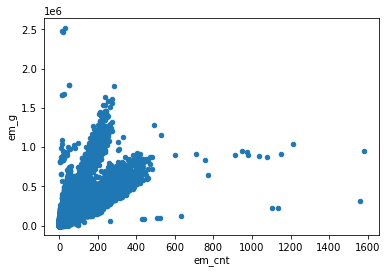

In [8]:
#쓰레기 건당 배출량 scatter plot을 통한 이상치 탐지
df.plot(x='em_cnt',y='em_g', kind = 'scatter')


In [9]:
#위 scatter plot에서 기울기가 높은 집단군 포집
em_cnt_under = df['em_cnt'] <= 250
em_g_over = df['em_g'] >= 600000

In [10]:
df_extraordinary = df[em_cnt_under & em_g_over]

In [11]:
df_extraordinary.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 1258 entries, 46 to 2210663
Data columns (total 8 columns):
 #   Column      Non-Null Count  Dtype 
---  ------      --------------  ----- 
 0   base_date   1258 non-null   object
 1   city        1258 non-null   object
 2   emd_cd      1258 non-null   object
 3   emd_nm      1258 non-null   object
 4   em_area_cd  1258 non-null   object
 5   em_cnt      1258 non-null   int64 
 6   em_g        1258 non-null   int64 
 7   pay_amt     1258 non-null   int64 
dtypes: int64(3), object(5)
memory usage: 88.5+ KB


In [12]:
df_extraordinary["emd_nm"].value_counts()

중앙동     1138
대정읍       38
표선면       29
성산읍       17
이도2동       9
노형동        6
동홍동        6
중문동        5
대륜동        4
외도동        2
화북동        2
일도2동       1
천지동        1
Name: emd_nm, dtype: int64

In [13]:
#해당 군집은 대부분 중앙동으로 나타남 - 중앙동 쓰레기 배출량 boxplot과 시계열 시각화
df_ca = df.loc[df['emd_nm'] == '중앙동']

In [14]:
df_ca.describe()

,em_cnt,em_g,pay_amt
count,5318.000000,5.318000e+03,5318.000000
mean,87.361038,3.570876e+05,10641.437006
std,75.602977,3.334587e+05,9989.912112
min,1.000000,4.500000e+02,13.000000
25%,42.000000,1.227750e+05,3666.500000
50%,67.000000,2.081750e+05,6185.000000
75%,113.000000,4.665375e+05,13546.500000
max,1580.000000,1.775000e+06,53187.000000


<AxesSubplot:>

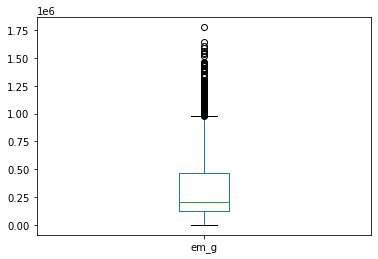

In [15]:
df_ca["em_g"].plot.box()

In [16]:
df_ca['base_year_month'] = df_ca['base_date'].str[:4] + '년 ' + df_ca['base_date'].str[5:7] + '월'

<ipython-input-16-31450e73a2ab>:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_ca['base_year_month'] = df_ca['base_date'].str[:4] + '년 ' + df_ca['base_date'].str[5:7] + '월'


In [17]:
df_ca

,base_date,city,emd_cd,emd_nm,em_area_cd,em_cnt,em_g,pay_amt,base_year_month
567,2018-01-01,서귀포시,50130530,중앙동,W6Y074,154,854000,25576,2018년 01월
568,2018-01-01,서귀포시,50130530,중앙동,W6Y072,39,101550,3039,2018년 01월
569,2018-01-01,서귀포시,50130530,중앙동,W6Y071,46,186900,5593,2018년 01월
570,2018-01-01,서귀포시,50130530,중앙동,W6Y070,23,86300,2581,2018년 01월
571,2018-01-01,서귀포시,50130530,중앙동,W6Y069,47,155550,4654,2018년 01월
...,...,...,...,...,...,...,...,...,...
2208159,2021-06-29,서귀포시,50130530,중앙동,W6Y069,82,264700,7921,2021년 06월
2210660,2021-06-30,서귀포시,50130530,중앙동,W6Y069,82,222700,6661,2021년 06월
2210661,2021-06-30,서귀포시,50130530,중앙동,W6Y070,97,400650,11999,2021년 06월
2210662,2021-06-30,서귀포시,50130530,중앙동,W6Y072,47,114150,3413,2021년 06월


In [18]:
ca_m_g = df_ca[["base_year_month","em_g"]]

In [19]:
ca_m_g

,base_year_month,em_g
567,2018년 01월,854000
568,2018년 01월,101550
569,2018년 01월,186900
570,2018년 01월,86300
571,2018년 01월,155550
...,...,...
2208159,2021년 06월,264700
2210660,2021년 06월,222700
2210661,2021년 06월,400650
2210662,2021년 06월,114150


<function matplotlib.pyplot.show(close=None, block=None)>

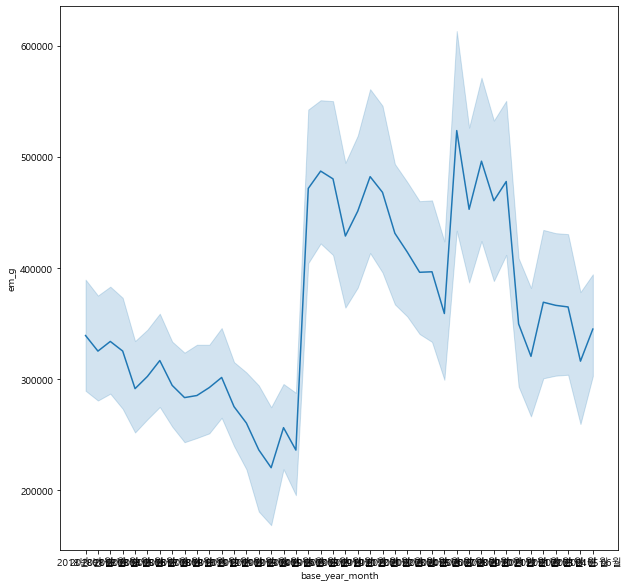

In [20]:
#알정 시점 이후로 증가세 - 유동인구와의 상관성 고려 
import seaborn as sns
import matplotlib.pyplot as plt
from matplotlib import font_manager, rc
import matplotlib
matplotlib.rcParams['font.family'] = 'Malgun Gothic'
matplotlib.rcParams['axes.unicode_minus'] = True
plt.figure(figsize=(10, 10))
g = sns.lineplot(x='base_year_month', y='em_g', data=ca_m_g)
plt.show

제주도 전체 

In [21]:
#건당 배출중량 변수생성

df['em_avg'] = df['em_g'] / df['em_cnt']

In [22]:
from matplotlib import font_manager, rc

font_name = font_manager.FontProperties(fname="c:/Windows/Fonts/malgun.ttf").get_name()
rc('font', family=font_name)

<AxesSubplot:xlabel='emd_nm', ylabel='count'>

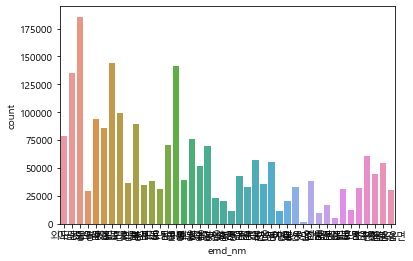

In [23]:
sns.countplot(x="emd_nm", data=df)

In [24]:
df_gb = df.groupby(['emd_nm']).mean()

In [25]:
df_gb = df_gb.dropna()

In [26]:
df_gb

,em_cnt,em_g,pay_amt,em_avg
emd_nm,,,,
건입동,24.172584,49559.645777,1482.675136,2276.681600
구좌읍,4.157770,12113.465821,362.369346,2913.540540
남원읍,10.209185,38971.638952,1165.826064,3874.693129
노형동,28.973132,57098.047033,1704.543413,2150.290275
대륜동,27.045690,63630.632135,1918.099452,2584.859816
대정읍,15.903945,48629.803173,1452.349807,3725.255729
대천동,28.006380,61507.027503,1824.020471,2762.602665
도두동,9.925633,24839.799463,742.763965,2733.655660
동홍동,37.378313,84931.922141,2536.531275,2542.724671


In [27]:
df_gb = df_gb.drop(['알수없음'])

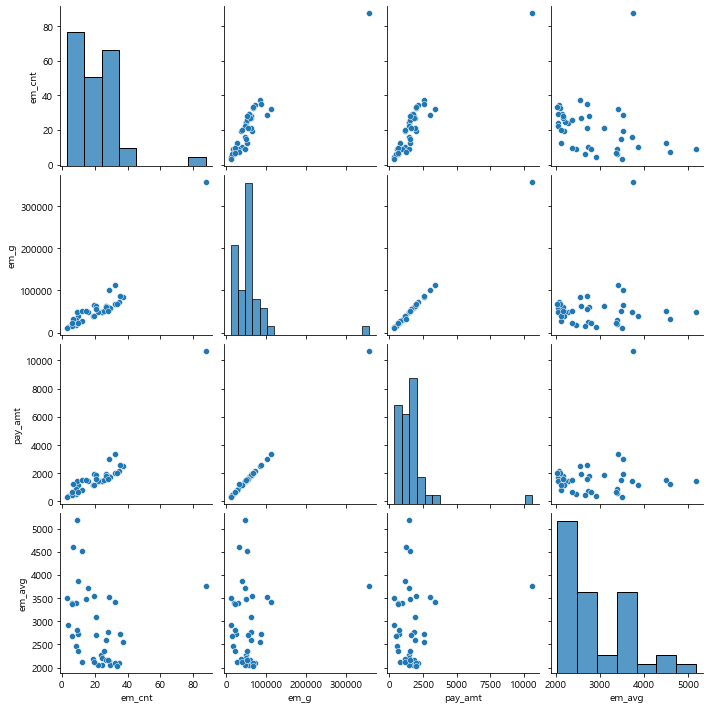

In [28]:
sns.pairplot(data = df_gb)

In [29]:
df_gb.corr()

,em_cnt,em_g,pay_amt,em_avg
em_cnt,1.000000,0.911066,0.908579,-0.209168
em_g,0.911066,1.000000,0.999553,0.136838
pay_amt,0.908579,0.999553,1.000000,0.146306
em_avg,-0.209168,0.136838,0.146306,1.000000


In [30]:
df_gb = df_gb.drop(['pay_amt'], axis=1)

In [31]:
df_gb.sort_values(ascending = False, by = 'em_avg', axis = 0)

,em_cnt,em_g,em_avg
emd_nm,,,
성산읍,9.027812,48393.698382,5182.122905
표선면,7.176442,31963.839673,4593.077130
영천동,12.518502,51457.376870,4509.701194
남원읍,10.209185,38971.638952,3874.693129
중앙동,87.361038,357087.551711,3764.479075
대정읍,15.903945,48629.803173,3725.255729
송산동,19.564223,66193.647703,3538.663988
정방동,28.731960,101767.613151,3520.467242
한경면,3.320545,11424.969772,3500.102139


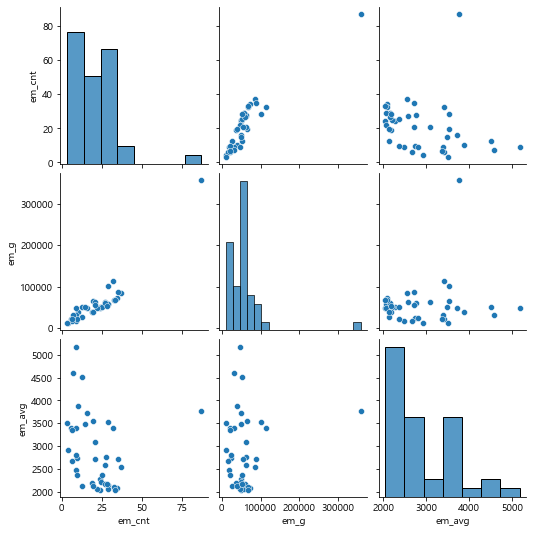

In [32]:
sns.pairplot(data = df_gb)